In [1]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab3/ex1.jpg
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab3/ex2.jpg
!ls

ex1.jpg  ex2.jpg  sample_data


Enter x value of pixel: 100
Enter y value of pixel: 100
Enter sigma: 50


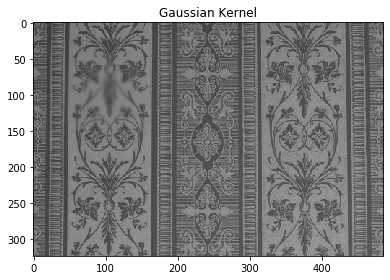

In [13]:
#Localized Blur Image by Gaussian Kernal
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import io
 
val_x = int(input("Enter x value of pixel: "))
val_y = int(input("Enter y value of pixel: "))
sigma = int(input("Enter sigma: "))

img = io.imread('ex1.jpg', as_gray =True)

current_img = np.copy(img)

height = img.shape[0]
width = img.shape[1]

maskHeight = 2*height+1
maskWidth = 2*width+1

gaussian_K = np.zeros((maskHeight,maskWidth))

def filterGaus():
  gaus_img = np.copy(img)

  blurred_img = cv2.GaussianBlur(gaus_img, (7, 7), 3).astype(np.float32)
  pixelX= val_x
  pixely=val_y

  value1 = width - pixelX
  value2 = height - pixely
  value3 = value1 + width
  value4 = value2 + height

  mask = gaussian_K[value2:value4, value1:value3]
  oldIMG = np.multiply(blurred_img, mask)
  newIMG = np.multiply(gaus_img, 1-mask)
  gaus_img = cv2.add(oldIMG, newIMG).astype(np.uint8)
  plt.title('Gaussian Kernel')
  io.imshow(gaus_img)
  #plt.xticks([]), plt.yticks([])

def gaussianKernel():
    for x in range(maskWidth):
        for y in range(maskHeight):
            weightX = float(width - x)
            weightY = float(height - y)
            weightGaus = (weightX * weightX + weightY * weightY) / (sigma * sigma)
            gaussian_K[y, x] = math.exp(-weightGaus)
try:
  gaussianKernel()
  filterGaus()
except:
    print("X and Y values are out of bounds")

Enter x value of pixel: 300
Enter y value of pixel: 200
Enter sigma: 50


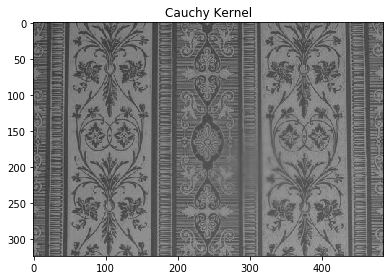

In [14]:
#Localized Blur Image by Cauchy Kernal
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import io

val_x = int(input("Enter x value of pixel: "))
val_y = int(input("Enter y value of pixel: "))
sigma = int(input("Enter sigma: "))

img = io.imread('ex1.jpg', as_gray =True)

current_img = np.copy(img)

height = img.shape[0]
width = img.shape[1]

maskHeight = 2*height+1
maskWidth = 2*width+1

cauchy_K = np.zeros((maskHeight,maskWidth))


def filterCauch():
  cauch_img = np.copy(img)

  blurred_img = cv2.GaussianBlur(cauch_img, (7, 7), 3).astype(np.float32)
  pixelX= val_x
  pixely=val_y
  value1 = width - pixelX
  value2 = height - pixely
  value3 = value1 + width
  value4 = value2 + height

  mask = cauchy_K[value2:value4, value1:value3] 
  oldIMG = np.multiply(blurred_img, mask)
  newIMG = np.multiply(cauch_img, 1-mask)
  cauch_img = cv2.add(oldIMG, newIMG).astype(np.uint8)
  plt.title('Cauchy Kernel')
  io.imshow(cauch_img)
  #plt.xticks([]), plt.yticks([])


def cauchyKernel():
    for x in range(maskWidth):
        for y in range(maskHeight):
            weightX = float(width - x)
            weightY = float(height - y)
            weightCauch = (weightX * weightX + weightY * weightY) / (sigma * sigma)
            cauchy_K[y, x] = 1 / (1 + weightCauch)
try:
  cauchyKernel()
  filterCauch()
except:
    print("X and Y values are out of bounds")

Enter x value of pixel: 200
Enter y value of pixel: 320
Enter sigma: 50


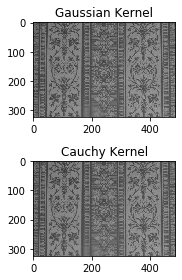

In [15]:
#Localized Blur Image by Gaussian Kernel and Cauchy Kernel
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import io

val_x = int(input("Enter x value of pixel: "))
val_y = int(input("Enter y value of pixel: "))
sigma = int(input("Enter sigma: "))

img = io.imread('ex1.jpg', as_gray =True)

current_img = np.copy(img)

height = img.shape[0]
width = img.shape[1]

maskHeight = 2*height+1
maskWidth = 2*width+1

gaussian_K = np.zeros((maskHeight,maskWidth))
cauchy_K = np.zeros((maskHeight,maskWidth))


def filterGaus():
  gaus_img = np.copy(img)

  blurred_img = cv2.GaussianBlur(gaus_img, (7, 7), 3).astype(np.float32)
  pixelX= val_x
  pixely=val_y

  value1 = width - pixelX
  value2 = height - pixely
  value3 = value1 + width
  value4 = value2 + height
  

  mask = gaussian_K[value2:value4, value1:value3]
  oldIMG = np.multiply(blurred_img, mask)
  newIMG = np.multiply(gaus_img, 1-mask)
  gaus_img = cv2.add(oldIMG, newIMG).astype(np.uint8)
  plt.subplot(2, 1, 1)
  plt.title('Gaussian Kernel')
  io.imshow(gaus_img)
  #plt.xticks([]), plt.yticks([])


def filterCauch():
  cauch_img = np.copy(img)

  blurred_img = cv2.GaussianBlur(cauch_img, (7, 7), 3).astype(np.float32)
  pixelX= val_x
  pixely=val_y
  value1 = width - pixelX
  value2 = height - pixely
  value3 = value1 + width
  value4 = value2 + height

  mask = cauchy_K[value2:value4, value1:value3] 
  oldIMG = np.multiply(blurred_img, mask)
  newIMG = np.multiply(cauch_img, 1-mask)
  cauch_img = cv2.add(oldIMG, newIMG).astype(np.uint8)
  plt.subplot(2, 1, 2)
  plt.title('Cauchy Kernel')
  io.imshow(cauch_img)
  #plt.xticks([]), plt.yticks([])


def gaussianKernel():
    for x in range(maskWidth):
        for y in range(maskHeight):
            weightX = float(width - x)
            weightY = float(height - y)
            weightGaus = (weightX * weightX + weightY * weightY) / (sigma * sigma)
            gaussian_K[y, x] = math.exp(-weightGaus)


def cauchyKernel():
    for x in range(maskWidth):
        for y in range(maskHeight):
            weightX = float(width - x)
            weightY = float(height - y)
            weightCauch = (weightX * weightX + weightY * weightY) / (sigma * sigma)
            cauchy_K[y, x] = 1 / (1 + weightCauch)

try:
  gaussianKernel()
  filterGaus()
  cauchyKernel()
  filterCauch()
except:
  print("X and Y values are out of bounds")